# Fabry Perot Interferometer

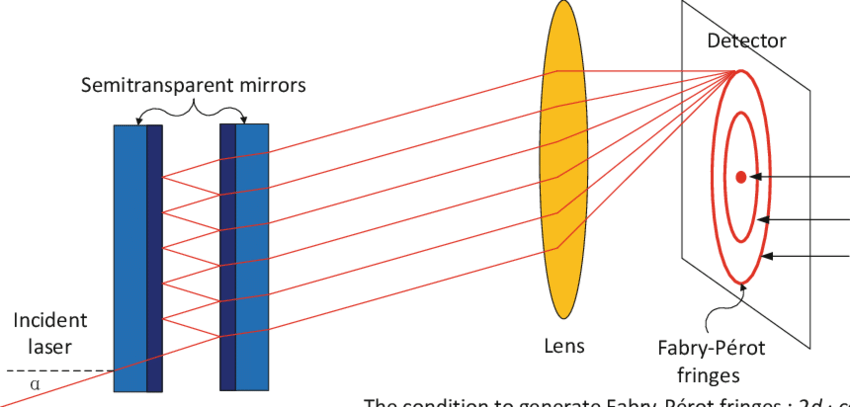

Image credit:
https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.physicsbootcamp.org%2Fsection-fabry-perot-interferometer.html&psig=AOvVaw0sCt_GLSxldEcW4tNWZr3O&ust=1763795599805000&source=images&cd=vfe&opi=89978449&ved=0CAMQjB1qFwoTCIio1OPYgpEDFQAAAAAdAAAAABAs

---

## 1. Calculation of Incident Angle, $\theta$

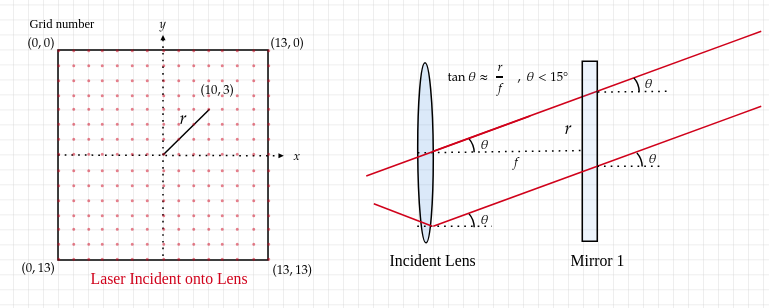

First of all, we must create an $(N+1)\times (N+1)$ grid section which represents the _surface of the first lens_ laser is incident onto. Second, after definint the lens surface, we need to find radius $r$ of each individual piece of the surface with respect to origin (e.g. grid (3,10) is $5$ cm away from origin). Third, we need to convert this into angle $\theta$, which represents the _angle of incidence_ of ray towards lens.

In [1]:
import numpy as np

def calculate_radius_theta(size, N, f):
    '''
    Calculate radius and theta values for each point on the grid
    '''
    step = size / N                 # Iteration step size = 0.0167mm
    center_offset = size / 2.0      # center middle, i.e. {x: -size/2.0 <= x <= size/2.0, or -R <= x <= R}
    indices = np.arange(0, N + 1)   # create indices for each point on grid
    Ray_positions = indices * step  # 1D axis
    X_arr, Y_arr = np.meshgrid(Ray_positions, Ray_positions)  # 2D grid 
    
    # Calculate centered X and Y
    X = X_arr - center_offset  # moving the grid to be centered at (0,0)
    Y = Y_arr - center_offset
    
    # Assign the final results back to the instance
    radius = np.sqrt(X**2 + Y**2) # obtain radius from the center of each point
    theta = radius / f            # Small angle approximation for divergence, theta = tan(theta)
    
    return radius, theta 

---

## 2. Calculation of Intensity $\mathrm{I}$, and Finesse $\mathcal{F}$

We can obtain the various intensities of the laser by considering the path length difference of each ray that propagates and exits the cavity.

First, finding coefficient $F':$
$$
F'=\frac{4R}{\left(1-R\right)^2}
$$

Second, finding the path length difference $\Phi$ :
$$
\Phi = 2knd\cos\theta
$$

Lastly, using the derived formula for intensity :

$$
\mathrm{I}=I_0\cdot\frac{1}{1+F'\sin\left(\frac{\Phi}{2}\right)^2}
$$

In [2]:
def calculate_intensity(R, k, n, d, theta, I0):
    """
    Calculate intensity distribution and finesse based on current parameters.
    """
    # Calculate the fineese at a certain point
    F_prime = (4.0 * R) / (1.0 - R)**2  # F'
    finesse = (np.pi * np.sqrt(R)) / (1 - R) 
    
    # Calculate intensity distibution I at every point on the grid
    Phi = 2 * k * n * d * np.cos(theta) # Phi angle (round trip)
    Inten = 1 / (1 + F_prime * np.sin(Phi/2)**2) # Assuming no loss and T + R = 1
    intensity = I0 * Inten      
    
    return finesse, intensity   

---

## 3. Calculation of Stability Parameter $g_1g_2$

For a laser cavity to be stable, we it needs to satisfy the inequality :
$$
0\leq g_1g_2\leq 1.0
$$
Stability coefficient $g_i$ for each reflecting mirror is given by the formula :
$$
g_i=1-\frac{d}{n R_i}
$$

In [3]:
def calculate_g1g2(R1, R2, d, n):
    ''' Calculate stability parameters g1 and g2'''
    g1 = 1 - ( d / (n * R1))
    g2 = 1 - ( d / (n * R2))
    
    return g1, g2

---

## Graph Plotting

In [20]:
# UNits
MM = 1e-3 
NM = 1e-9  

# Parameters
labda = 550 * NM                  # Wavelength
size  = 5 * MM                    # Size of grid
N     = 300                       # Grid dimension
f     = 100 * MM                  # Lens focal length
R     = 0.85                      # Reflectivity
d     = 5.5 * MM                  # Separation
n     = 1.0                       # Refractive index
k     = 2 * np.pi / labda         # Wavenumber

# Pre-calculated values for interference, finesse and stability plotting
I0 = 1.0                  # Obtain initial intensity
radius = None             # Radius array
theta = None              # Theta array
finesse = None            # Finesse value
intensity = None          # Normalised intensity (all generated points have equal intensity)

radius, theta = calculate_radius_theta(size, N, f)
finesse, intensity = calculate_intensity(R, k, n, d, theta, I0)
g1, g2 = calculate_g1g2(R, R, d, n)  # Example radii of curvature for mirrors


In [5]:
# display(radius)
# display(theta)
# display(finesse)
# display(intensity)

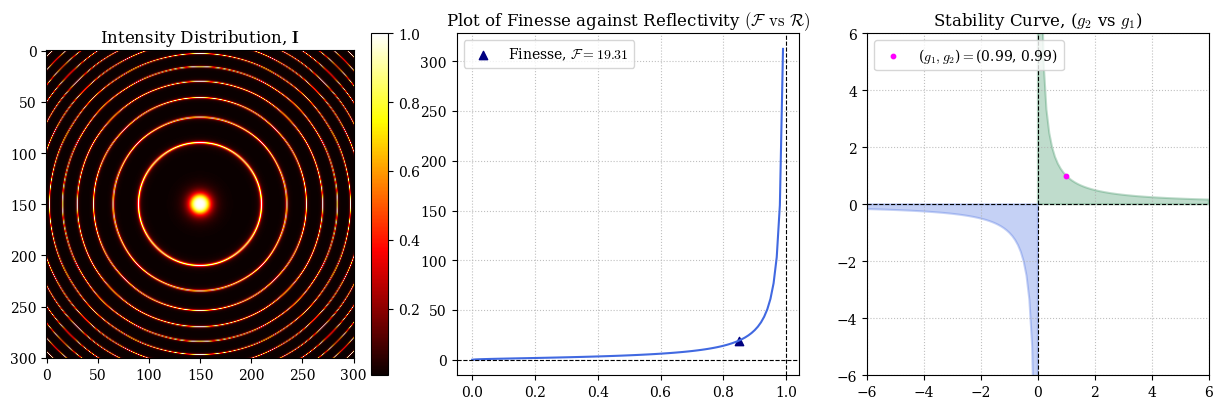

In [21]:
import matplotlib.pyplot as plt

# MPL settings
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['figure.dpi'] = 100

# Create matplotlib figure and axes 
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# Creating finesse static plot
R_arr = (np.arange(0, 100, 1)) * 0.01 # Reflectivity array for plotting finesse graph
F_arr = (np.pi * np.sqrt(R_arr)) / (1 - R_arr)
# Create static stability plot 
g_arr_left = np.arange(-6.0, 0, 0.1)  # g1 values for stability plot
g_arr_right = np.arange(0.1, 6.1, 0.1) 
y_g_arr_left = np.append(1 / g_arr_left, -15)
y_g_arr_right = np.insert(1 / g_arr_right, 0, 15)
g_arr_left = np.append(g_arr_left, 0)
g_arr_right = np.insert(g_arr_right, 0, 0)
g_max = np.abs(np.max([g_arr_left, g_arr_right])) 


# Plot intensity distribution
ax1.set_title(r"Intensity Distribution, $\mathbf{I}$", fontsize=12)
fringes = ax1.imshow(intensity, cmap='hot', aspect='equal')
colorbar = fig.colorbar(fringes, ax=ax1, orientation='vertical', fraction=0.05, pad=0.05)

# Finesse plot
ax2.set_title(r"Plot of Finesse against Reflectivity $(\mathcal{F}\text{ vs }\mathcal{R})$")
(finesse_line,) = ax2.plot(R_arr, F_arr, color='royalblue')
finesse_marker = ax2.scatter(R, finesse, color='navy', marker='^', label=rf'Finesse, $\mathcal{{F}}={finesse:.2f}$')
ax2.axhline(y=0.0, color='black', ls='--', lw=0.8)
ax2.axvline(x=1.0, color='black', ls='--', lw=0.8)
ax2.grid(ls=':', alpha=0.8)
ax2.legend(loc='upper left')
# Set aspect ratio to make plot area square
data_ratio = (F_arr.max() - F_arr.min()) / (R_arr.max() - R_arr.min())
ax2.set_aspect(1.0 / data_ratio)

# 3. Stability curve 
ax3.set_title("Stability Curve, ($g_2$ vs $g_1$)")
ax3.fill_between(g_arr_right, y_g_arr_right, color="seagreen", edgecolor="seagreen", alpha=0.3, linewidth=1.5, zorder=0) # fill are beneath curve
ax3.fill_between(g_arr_left, y_g_arr_left, color="royalblue", edgecolor="royalblue", alpha=0.3, linewidth=1.5, zorder=0)
g1g2_marker = ax3.scatter(g1, g2, color='magenta', marker='o', s=10, label=rf'($g_1,g_2$)$=$({g1:.2f}, {g2:.2f})', zorder=1)
ax3.set_xlim(-g_max, g_max)
ax3.set_ylim(-g_max, g_max)
ax3.axhline(y=0.0, color='black', ls='--', lw=0.8)
ax3.axvline(x=0.0, color='black', ls='--', lw=0.8)
ax3.grid(ls=':', alpha=0.8)
ax3.legend(loc='upper left')
ax3.set_aspect('equal')